In [1]:
import pandas as pd
import random

import Network as nn
from Optimizers import Optimizers
from ActivationFuncs import *
from Util import *


data = pd.read_csv('ai_data.csv')

ocean_proximity_encoded = pd.get_dummies(data['ocean_proximity'], drop_first=True, dtype='float64')

data = pd.concat([data.drop('ocean_proximity', axis=1), ocean_proximity_encoded], axis=1)

data = data.fillna(data.mean())

data['rooms_per_household'] = data['total_rooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  INLAND  ISLAND  \
0       322.0       126.0         8.3252            452600.0     0.0     0.0   
1      2401.0      1138.0         8.3014            358500.0     0.0     0.0   
2       496.0       177.0         7.2574            352100.0     0.0     0.0   
3       558.0       219.0         5.6431            341300.0     0.0     0.0   
4       565.0       259.0         3.8462            342200.0     0.0     0.0   

   NEAR BAY  NEAR OCEAN  rooms_per_household  population_per_househo

In [2]:
X = data.drop('median_house_value', axis=1).values
y = data['median_house_value'].values.reshape(-1, 1)

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X = (X - X_min) / (X_max - X_min)

y_min = y.min()
y_max = y.max()
y = (y - y_min) / (y_max - y_min)   

In [3]:
np.random.seed(42)
random.seed(42)
indices = np.random.permutation(X.shape[0])

train_size = int(0.8 * X.shape[0])

x_train, x_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = X[indices[:train_size]], X[indices[train_size:]]

learning_rate = 1e-2
epochs = 200
b_size = 2 ** 5
tolerance = 1e-3
verbose = True
decay_rate = 1 - 1e-4
hidden_layers = [64, 32, 16]
activation_func = ActivationFuncs.TANH
early_stopping_patience = 1
momentum = 0.7
epsilon = 1e-9

Training with Network
Epoch: 0, Loss: 0.014983928866829354
Early stopping triggered


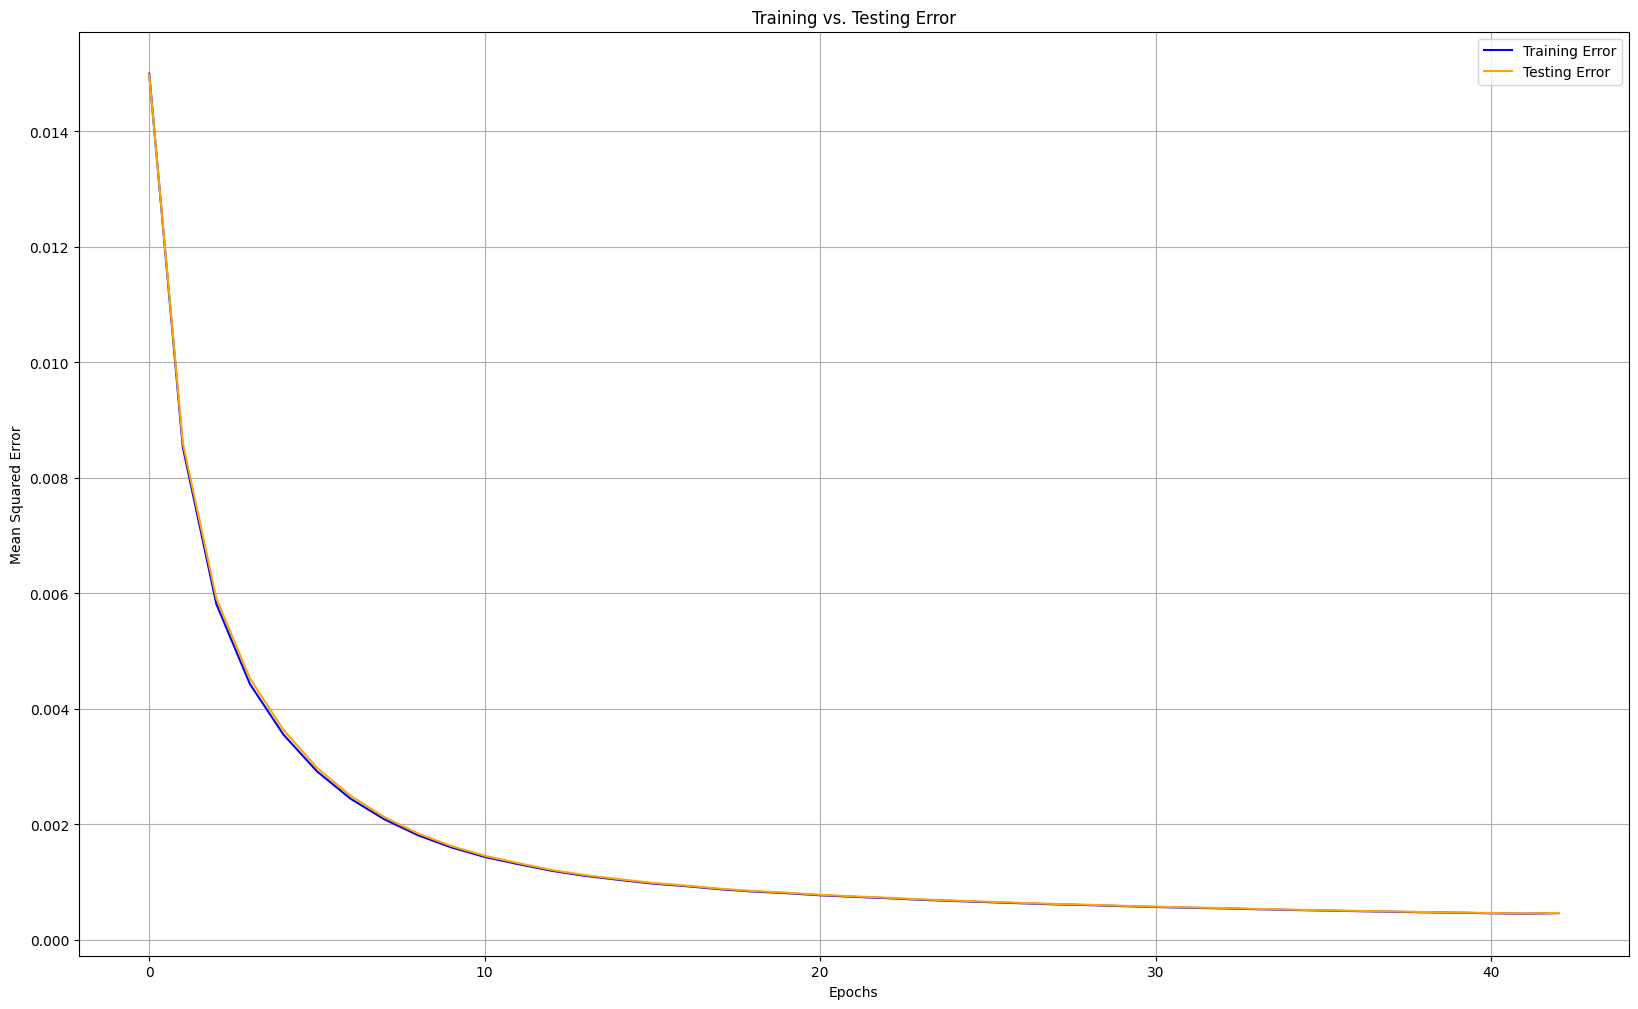

In [4]:
sgd_model = nn.Network(l_rate=learning_rate, ep=epochs, b_size=b_size, tol=tolerance, verbose=verbose, decay_rate=decay_rate, hidden_layers=hidden_layers, activation_func=activation_func, early_stopping_patience=early_stopping_patience)

print('Training with Network')
_, _ = sgd_model.fit(x_train, y_train, x_test, y_test)

In [5]:
test_model(sgd_model, x_test, y_test, y_max, y_min, "Testing Network model")

Testing Network model
Loss: 0.00046899727877484877
Coefficient of determination: 0.988318
Mean difference: 6738.696989575217
Predicted cost: 211543, actual cost: 212574, difference: 1030
Predicted cost: 324078, actual cost: 326095, difference: 2017
Predicted cost: 308711, actual cost: 304357, difference: 4353
Predicted cost: 328516, actual cost: 314502, difference: 14014
Predicted cost: 170507, actual cost: 226583, difference: 56075
Predicted cost: 113979, actual cost: 106782, difference: 7197
Predicted cost: 357172, actual cost: 358944, difference: 1772
Predicted cost: 263217, actual cost: 260398, difference: 2818
Predicted cost: 297046, actual cost: 306290, difference: 9243
Predicted cost: 152029, actual cost: 129969, difference: 22059
Predicted cost: 113546, actual cost: 116926, difference: 3380
Predicted cost: 152374, actual cost: 160886, difference: 8511
Predicted cost: 344258, actual cost: 338172, difference: 6085
Predicted cost: 150815, actual cost: 153156, difference: 2341
Pred

Training with SGDWithMomentum
Epoch: 0, Loss: 0.005962766515156689
Early stopping triggered


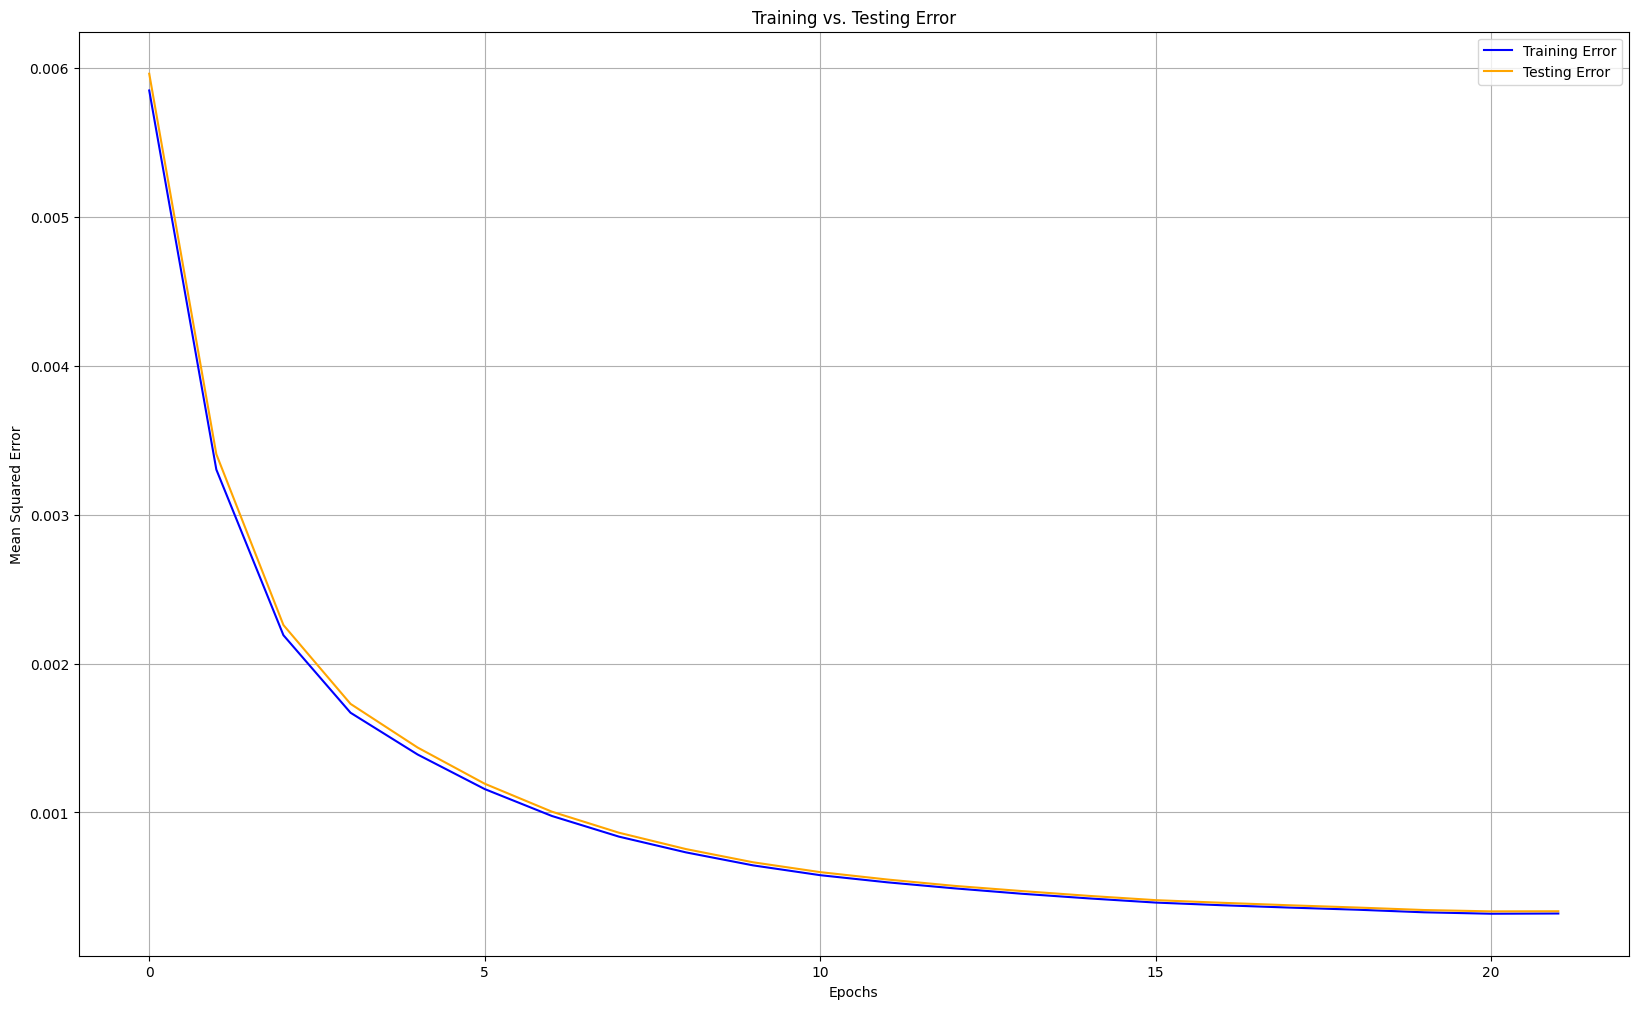

In [6]:
sgd_momentum_model = nn.Network(l_rate=learning_rate, ep=epochs, b_size=b_size, tol=tolerance, verbose=verbose, decay_rate=decay_rate, early_stopping_patience=early_stopping_patience, momentum=momentum, hidden_layers=hidden_layers, activation_func=activation_func, optimizer=Optimizers.SGD_MOMENTUM)

print('Training with SGDWithMomentum')
w, b = sgd_momentum_model.fit(x_train, y_train, x_test, y_test)

In [7]:
test_model(sgd_momentum_model, x_test, y_test, y_max, y_min, "Testing SGDWithMomentum model")

Testing SGDWithMomentum model
Loss: 0.0003363128185745895
Coefficient of determination: 0.991623
Mean difference: 5609.381217581547
Predicted cost: 215820, actual cost: 212574, difference: 3245
Predicted cost: 325454, actual cost: 326095, difference: 641
Predicted cost: 300885, actual cost: 304357, difference: 3471
Predicted cost: 321939, actual cost: 314502, difference: 7436
Predicted cost: 196870, actual cost: 226583, difference: 29712
Predicted cost: 101948, actual cost: 106782, difference: 4834
Predicted cost: 360460, actual cost: 358944, difference: 1515
Predicted cost: 261633, actual cost: 260398, difference: 1235
Predicted cost: 300463, actual cost: 306290, difference: 5826
Predicted cost: 138388, actual cost: 129969, difference: 8418
Predicted cost: 120389, actual cost: 116926, difference: 3462
Predicted cost: 160137, actual cost: 160886, difference: 748
Predicted cost: 338375, actual cost: 338172, difference: 202
Predicted cost: 155610, actual cost: 153156, difference: 2453
Pr

Training with Adam
Epoch: 0, Loss: 0.005341987674393083
Early stopping triggered


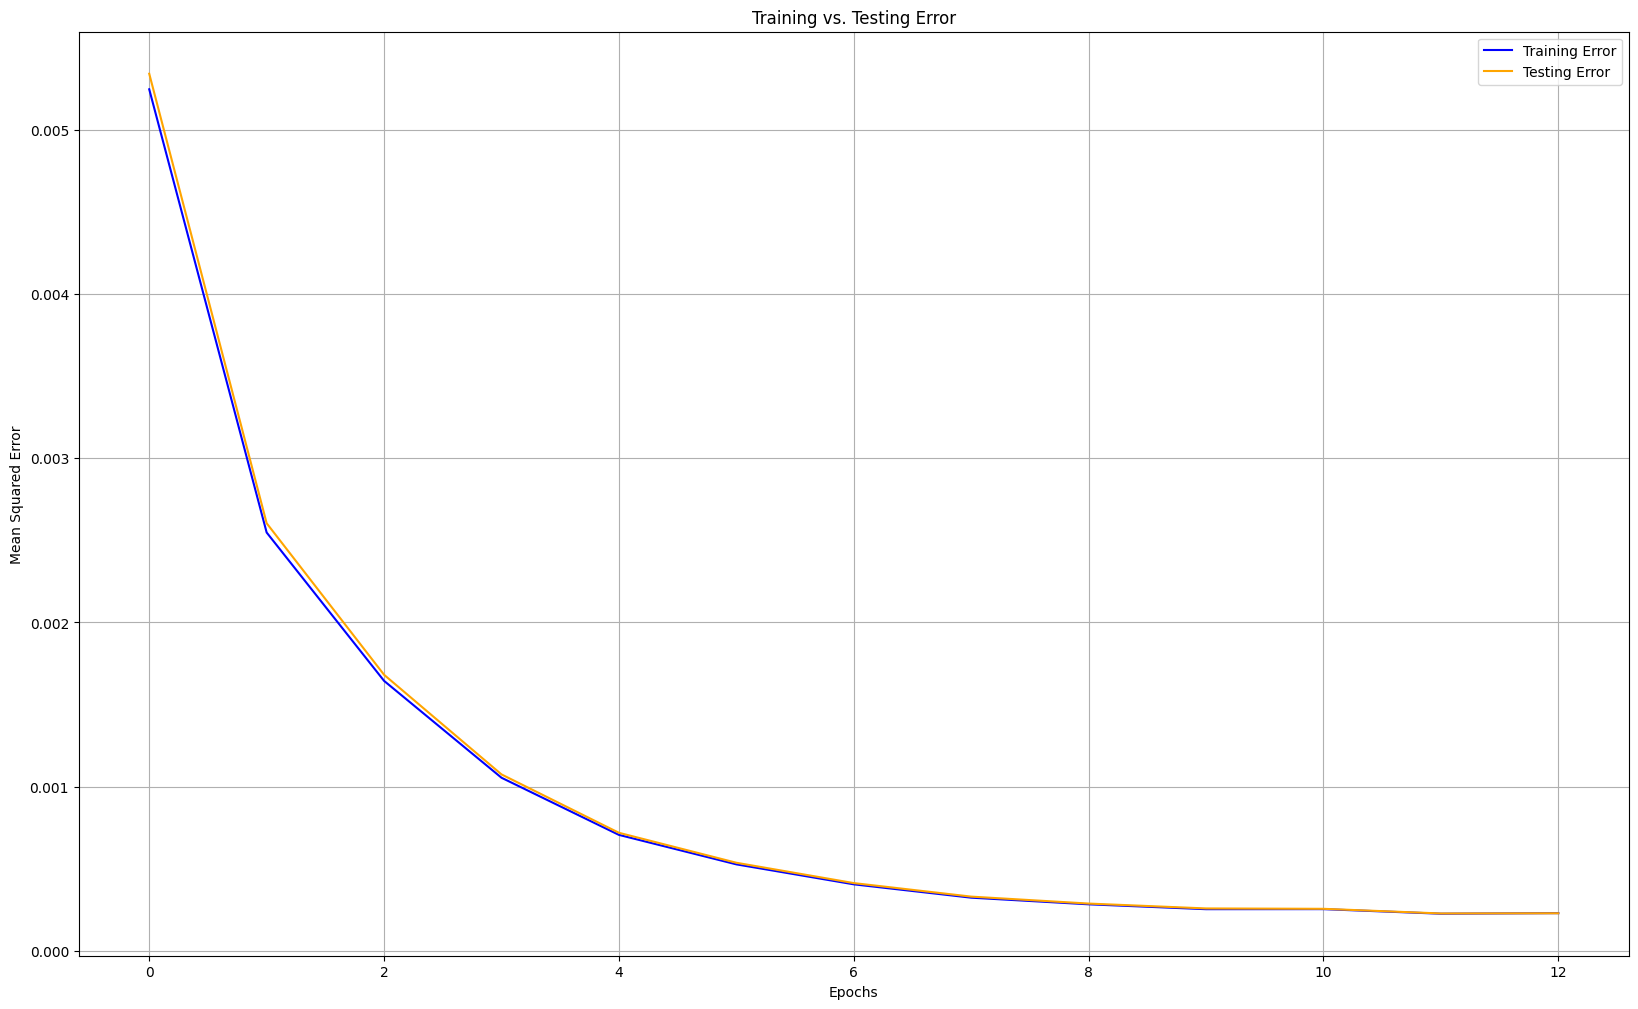

In [8]:
adam_model = nn.Network(l_rate=learning_rate, ep=epochs, b_size=b_size, tol=tolerance, verbose=verbose, decay_rate=decay_rate, early_stopping_patience=early_stopping_patience, epsilon=epsilon, hidden_layers=hidden_layers, activation_func=activation_func, optimizer=Optimizers.ADAM)

print('Training with Adam')
_, _ = adam_model.fit(x_train, y_train, x_test, y_test)

In [9]:
test_model(adam_model, x_test, y_test, y_max, y_min, "Testing Adam model")

Testing Adam model
Loss: 0.00022888879045948564
Coefficient of determination: 0.994299
Mean difference: 4417.431236132181
Predicted cost: 208926, actual cost: 212574, difference: 3648
Predicted cost: 321253, actual cost: 326095, difference: 4842
Predicted cost: 304502, actual cost: 304357, difference: 145
Predicted cost: 315235, actual cost: 314502, difference: 733
Predicted cost: 182096, actual cost: 226583, difference: 44486
Predicted cost: 103968, actual cost: 106782, difference: 2814
Predicted cost: 357593, actual cost: 358944, difference: 1350
Predicted cost: 257519, actual cost: 260398, difference: 2878
Predicted cost: 297576, actual cost: 306290, difference: 8713
Predicted cost: 139343, actual cost: 129969, difference: 9373
Predicted cost: 109656, actual cost: 116926, difference: 7270
Predicted cost: 149572, actual cost: 160886, difference: 11313
Predicted cost: 339030, actual cost: 338172, difference: 857
Predicted cost: 143522, actual cost: 153156, difference: 9634
Predicted c

Training XOR
Epoch: 0, Loss: 3.571819917161275
Epoch: 100, Loss: 0.25108216900471997
Epoch: 200, Loss: 0.22572769591707337
Epoch: 300, Loss: 0.18222280711730648
Epoch: 400, Loss: 0.14801985207656604


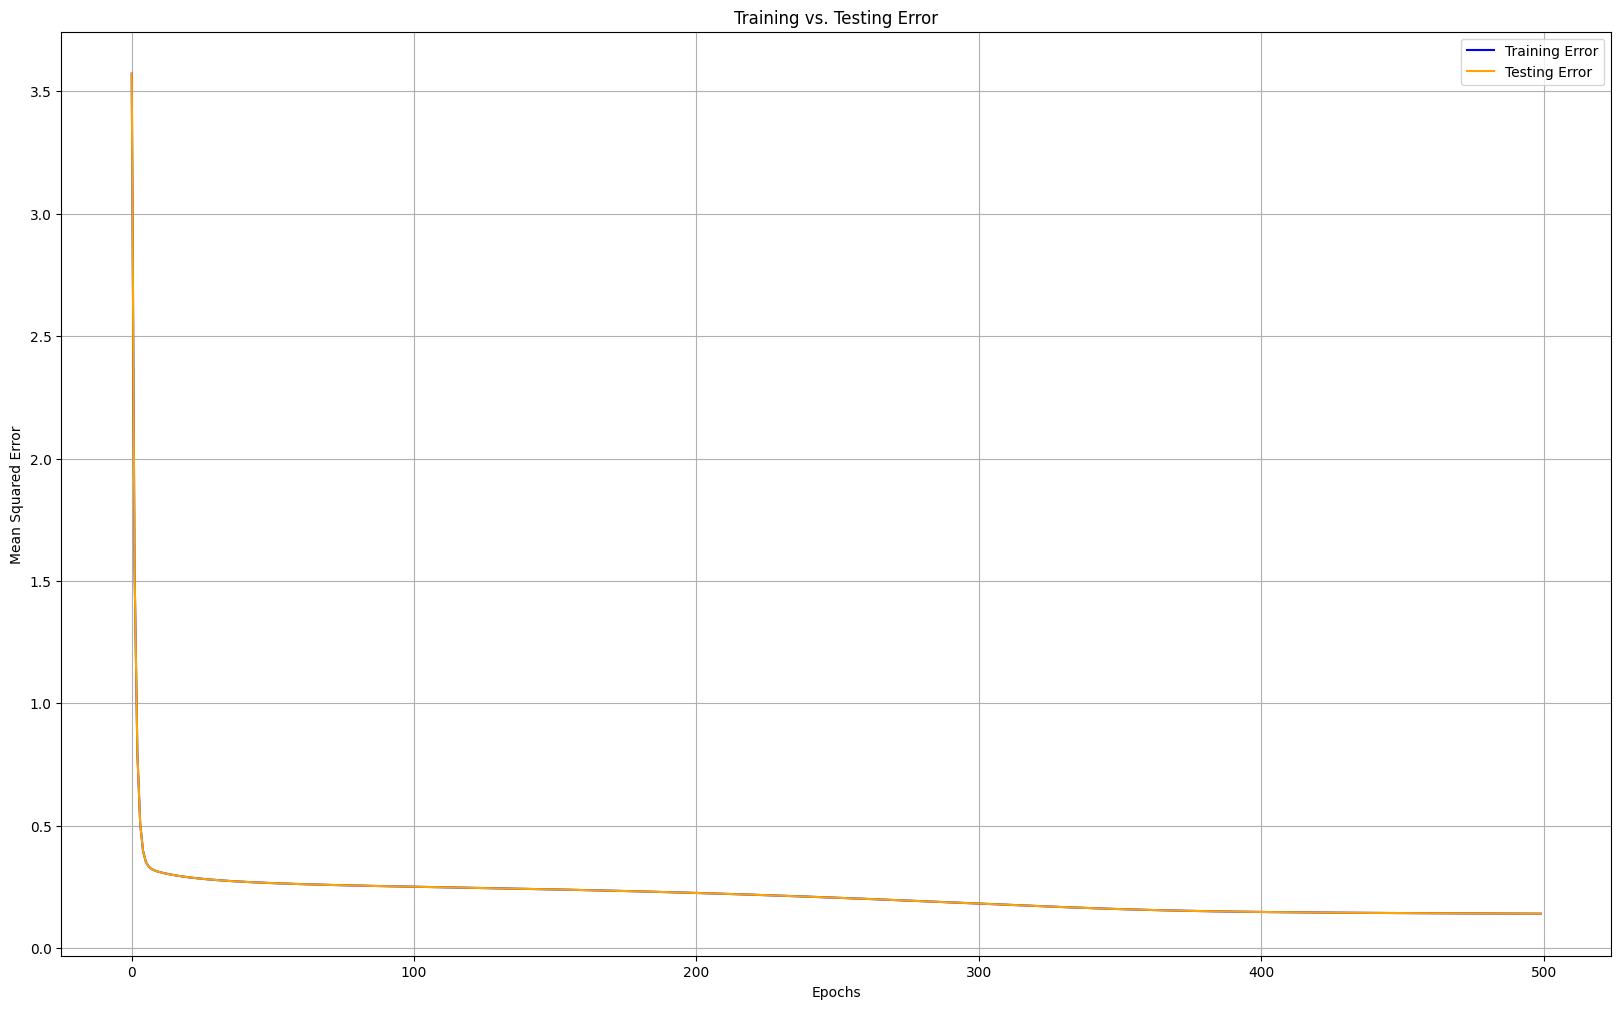

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y_xor = np.array([[0], [1], [1], [0]])
y_and = np.array([[0], [0], [0], [1]])
y_or = np.array([[0], [1], [1], [1]])

layers = [4]
lr = 1e-1
ep = 500
b_size = 2 ** 5
tl = 1e-3
dr = 1 - 1e-4
af = ActivationFuncs.TANH

sgd_model_xor = nn.Network(l_rate=lr, ep=ep, b_size=b_size, tol=tl, verbose=verbose, decay_rate=decay_rate, hidden_layers=layers, activation_func=af, early_stopping_patience=early_stopping_patience)
sgd_model_and = nn.Network(l_rate=lr, ep=ep, b_size=b_size, tol=tl, verbose=verbose, decay_rate=decay_rate, hidden_layers=layers, activation_func=af, early_stopping_patience=early_stopping_patience)
sgd_model_or = nn.Network(l_rate=lr, ep=ep, b_size=b_size, tol=tl, verbose=verbose, decay_rate=decay_rate, hidden_layers=layers, activation_func=af, early_stopping_patience=early_stopping_patience)

print('Training XOR')
_, _ = sgd_model_xor.fit(X, y_xor, X, y_xor)

Training AND
Epoch: 0, Loss: 1.2720909835300573
Epoch: 100, Loss: 0.08882764870680447
Epoch: 200, Loss: 0.01975455244502789
Epoch: 300, Loss: 0.0021498864619082566
Epoch: 400, Loss: 0.0005413847636414163


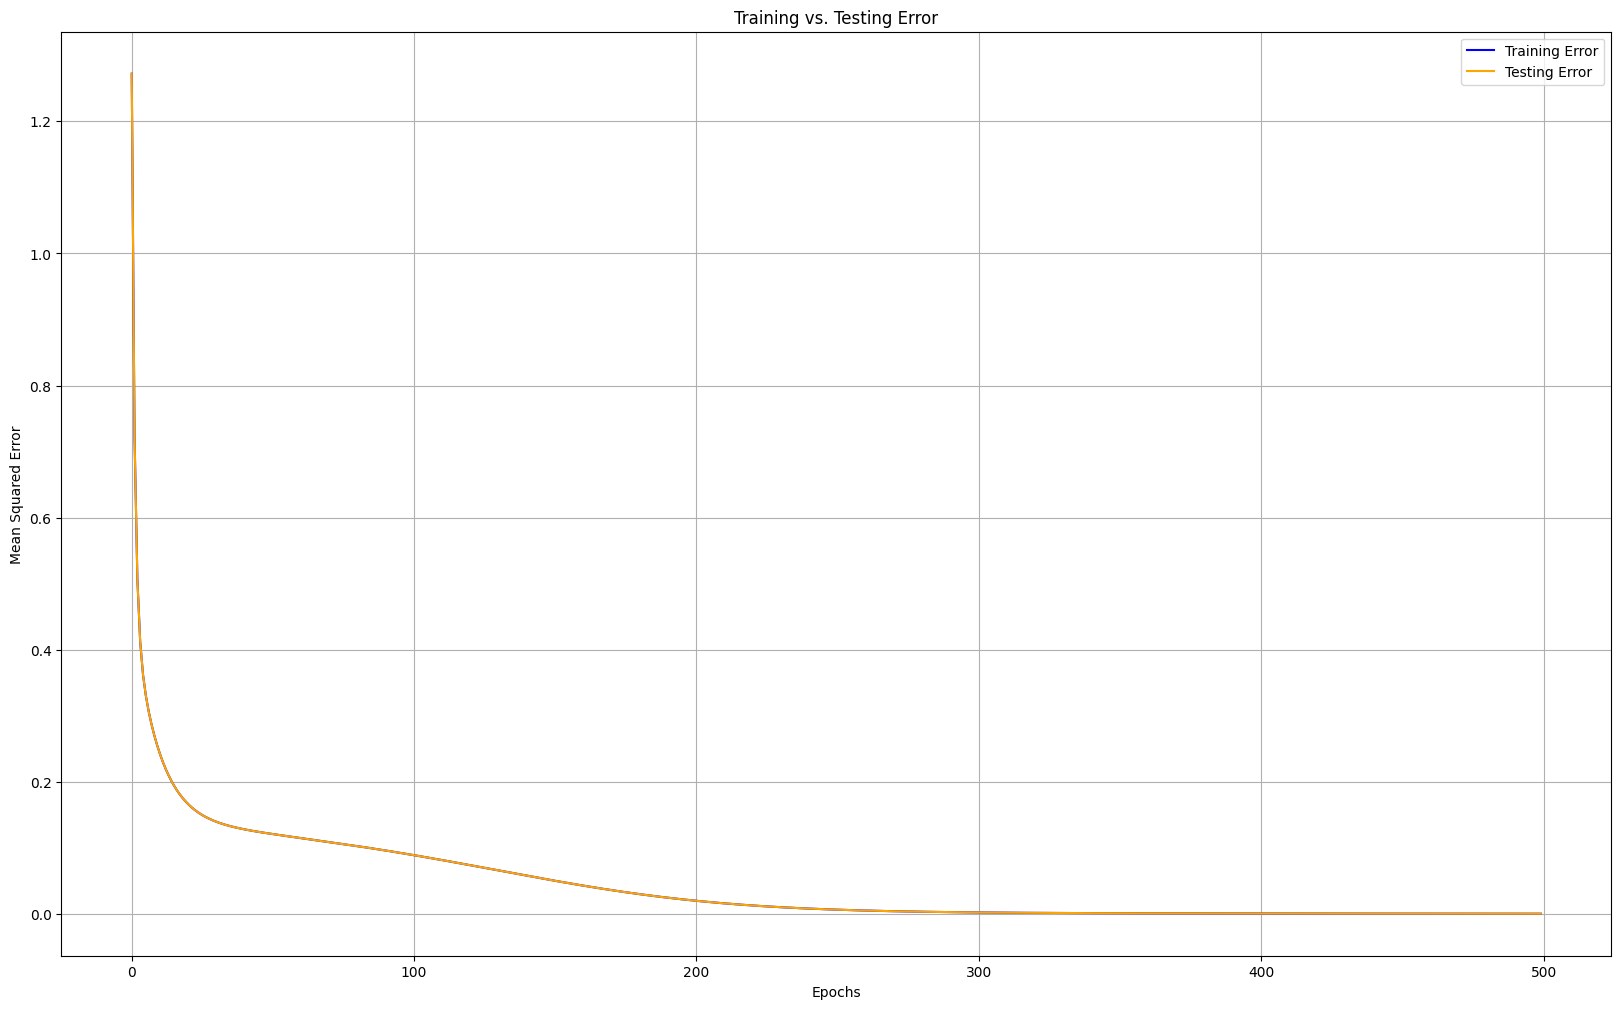

In [11]:
print('Training AND')
_, _ = sgd_model_and.fit(X, y_and, X, y_and)

Training OR
Epoch: 0, Loss: 0.5965439210472019
Epoch: 100, Loss: 0.008687037828413634
Epoch: 200, Loss: 0.003946901880645953
Epoch: 300, Loss: 0.00246124692956075
Epoch: 400, Loss: 0.0016755159814334523


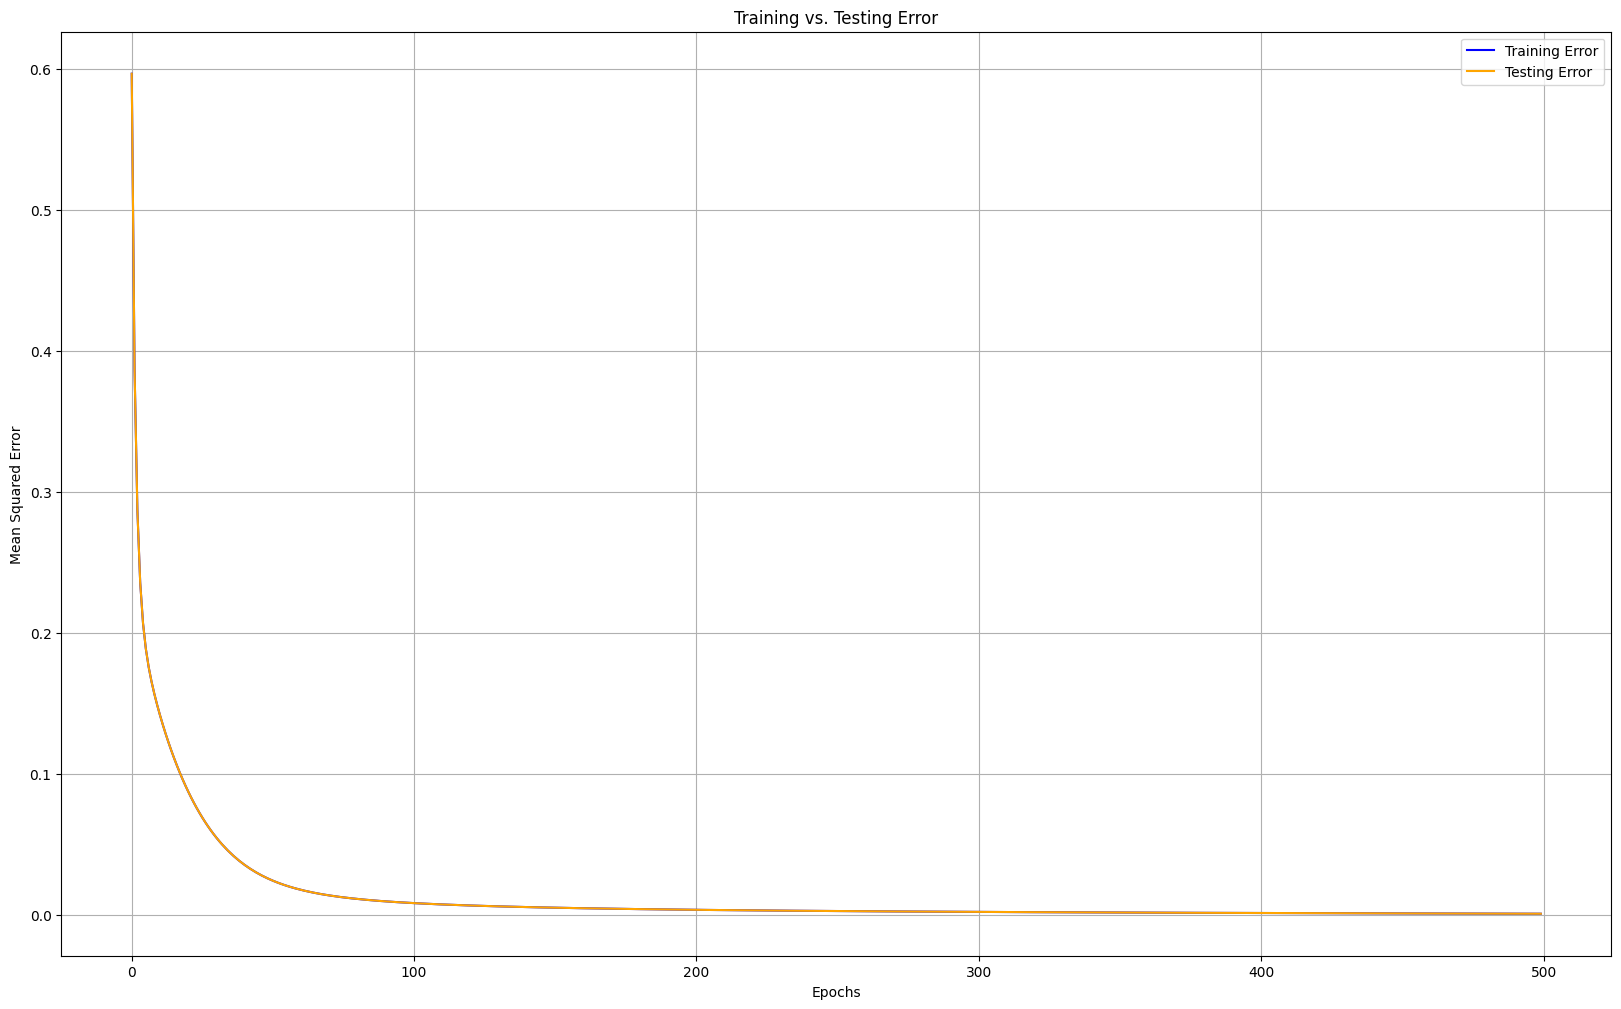

In [12]:
print('Training OR')
_, _ = sgd_model_or.fit(X, y_or, X, y_or)

In [13]:
test_binary_model(sgd_model_xor, X, y_xor, "Testing XOR problem")

Testing XOR problem
Loss: 0.14088449268813902
Coefficient of determination: 0.43646202924744393
Predicted value: 0.06556587682778064 = 0, actual value: 0
Predicted value: 0.4527276600296943 = 0, actual value: 1
Predicted value: 0.9767526828872801 = 1, actual value: 1
Predicted value: 0.5091086668863998 = 1, actual value: 0


In [14]:
test_binary_model(sgd_model_and, X, y_and, "Testing AND problem")

Testing AND problem
Loss: 0.00022091189521366146
Coefficient of determination: 0.9988218032255272
Predicted value: -0.019072026434671763 = 0, actual value: 0
Predicted value: 0.009861978342259548 = 0, actual value: 0
Predicted value: 0.018791142336357147 = 0, actual value: 0
Predicted value: 0.9916609508095109 = 1, actual value: 1


In [15]:
test_binary_model(sgd_model_or, X, y_or, "Testing OR problem")

Testing OR problem
Loss: 0.0011783383469580722
Coefficient of determination: 0.9937155288162236
Predicted value: 0.014616845507609083 = 0, actual value: 0
Predicted value: 0.971937549933221 = 1, actual value: 1
Predicted value: 0.9652784711457614 = 1, actual value: 1
Predicted value: 1.0500661117474963 = 1, actual value: 1
